In [16]:
# 2019년 9월 BC 카드 분석본  

In [17]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv("../data/BC_Card_edit.csv")
print(df.info())
df.head()
# 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB
None


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [19]:
df['기준년월'].value_counts()

202003    135706
202103    128725
201909    109747
202009     76858
201903     68261
Name: 기준년월, dtype: int64

In [20]:
print(df[df['고객소재지_광역시도'] != '서울특별시'].shape[0])
print(df[df['고객소재지_광역시도'] == '서울특별시'].shape[0])
df = df[df['고객소재지_광역시도'] == '서울특별시']
df_1903 = df[df['기준년월'] == 201909]

213175
306122


In [21]:
df_1903.head(10)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
66588,201909,16,식품,1612,음료,여성,20대,신혼영유아가구,서울특별시,강동구,길동,401631,9
66590,201909,11,패션잡화,1112,가방,여성,30대,신혼영유아가구,서울특별시,광진구,능동,1688549,17
66591,201909,20,여가/스포츠,2013,여행,여성,40대,초중고자녀가구,서울특별시,광진구,능동,2128596,19
66592,201909,16,식품,1612,음료,여성,30대,1인가구,서울특별시,광진구,능동,95919,5
66598,201909,11,패션잡화,1112,가방,여성,40대,신혼영유아가구,서울특별시,양천구,목동,2621338,12
66599,201909,15,전자,1510,가전,여성,40대,신혼영유아가구,서울특별시,양천구,목동,955559,14
66600,201909,11,패션잡화,1110,양말,여성,50대,성인자녀가구,서울특별시,양천구,목동,234707,7
66604,201909,20,여가/스포츠,2011,레저,남성,30대,신혼영유아가구,서울특별시,중랑구,묵동,699976,9
66605,201909,20,여가/스포츠,2012,문화,여성,20대,1인가구,서울특별시,중랑구,묵동,6620798,53
66606,201909,11,패션잡화,1111,신발,여성,50대,성인자녀가구,서울특별시,중랑구,묵동,772965,17


In [22]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist])) 
mpl.rc('font', family='NanumBarunGothic') 

여성    40940
남성    23591
Name: 성별, dtype: int64


<AxesSubplot:>

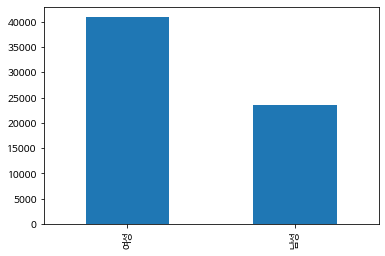

In [23]:
print(df_1903['성별'].value_counts())
df_1903['성별'].value_counts().plot.bar()

6 개
['20대', '30대', '40대', '50대', '60대 이상', '20세 미만']
30대       19556
40대       18824
20대       14163
50대        7929
60대 이상     3056
20세 미만     1003
Name: 연령, dtype: int64


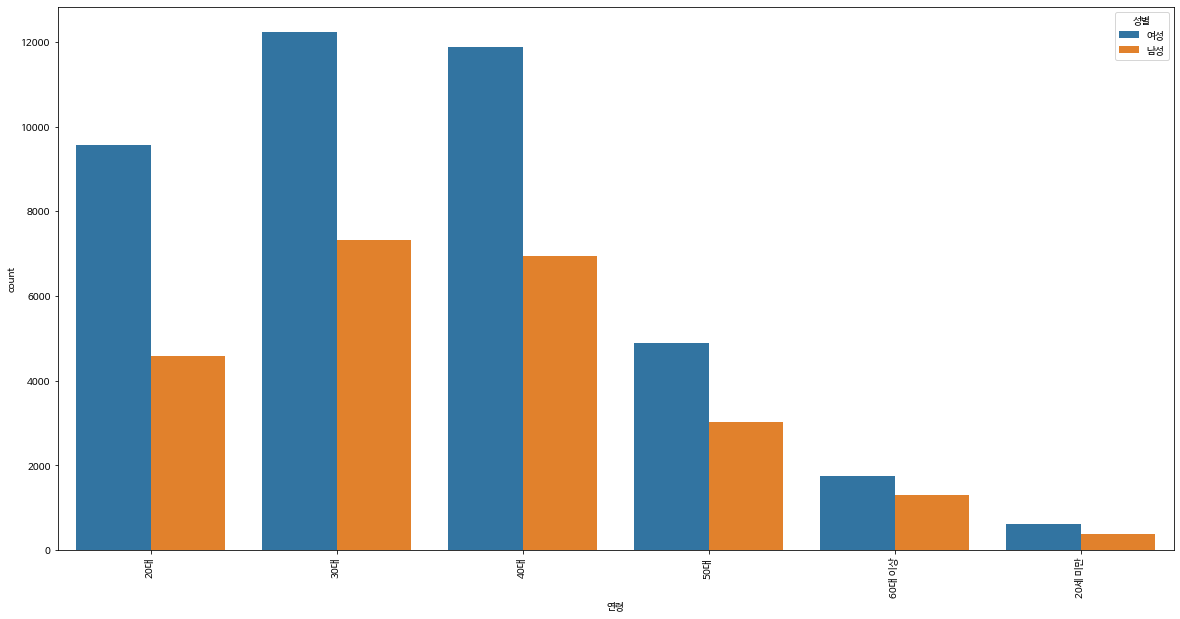

여성 연령 분포 및 순위
30대       12224
40대       11884
20대        9568
50대        4902
60대 이상     1746
20세 미만      616
Name: 연령, dtype: int64
30대       1.0
40대       2.0
20대       3.0
50대       4.0
60대 이상    5.0
20세 미만    6.0
Name: 연령, dtype: float64
남성 연령 분포 및 순위
30대       7332
40대       6940
20대       4595
50대       3027
60대 이상    1310
20세 미만     387
Name: 연령, dtype: int64
30대       1.0
40대       2.0
20대       3.0
50대       4.0
60대 이상    5.0
20세 미만    6.0
Name: 연령, dtype: float64


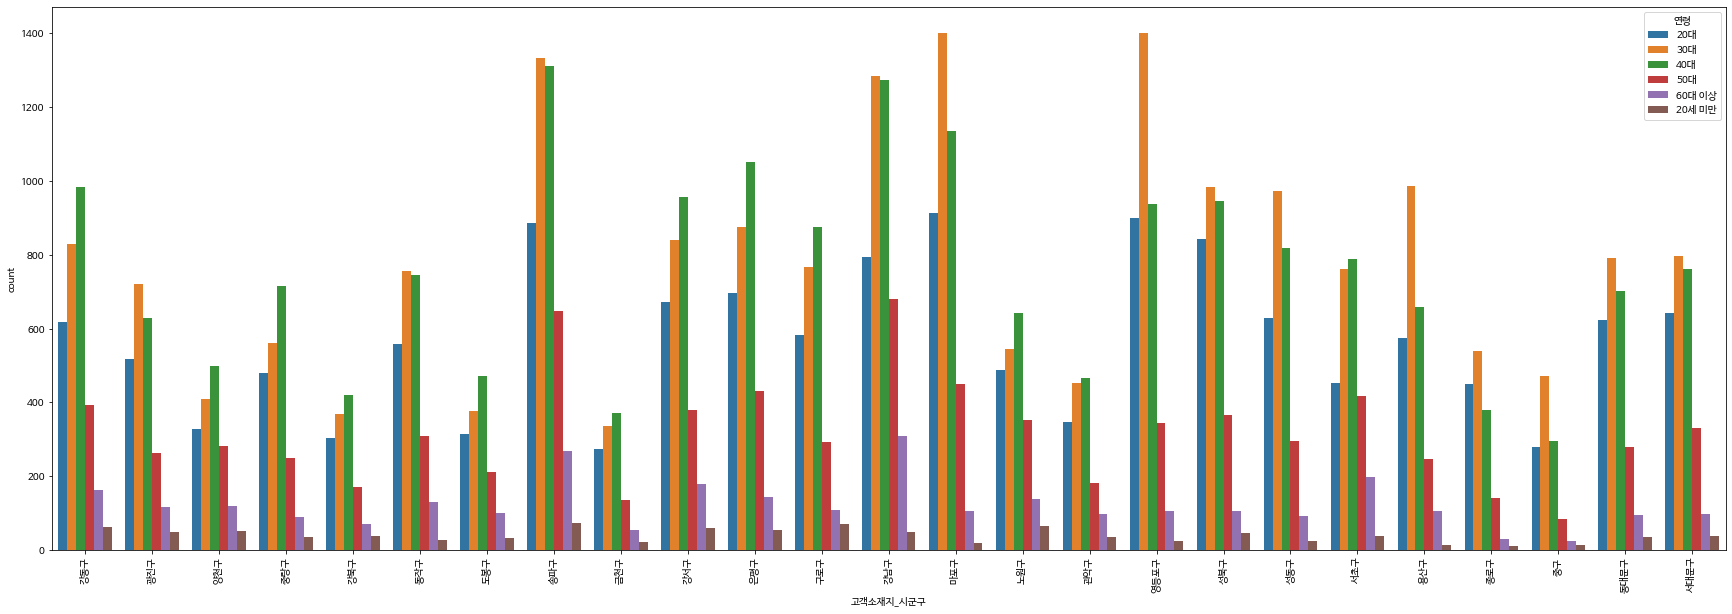

In [24]:
age = list(set(df_1903['연령']))
print(len(age),'개')
print(age)

# 총 연령 분포
print(df_1903['연령'].value_counts())

plt.figure(figsize=(20,10))
sns.countplot(x='연령', hue = '성별', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

df_1903_female =df_1903[df_1903['성별'] == '여성']
print('여성 연령 분포 및 순위')
print(df_1903_female['연령'].value_counts())
print(df_1903_female['연령'].value_counts().rank(ascending = False))

df_1903_male =df_1903[df_1903['성별'] == '남성']
print('남성 연령 분포 및 순위')
print(df_1903_male['연령'].value_counts())
print(df_1903_male['연령'].value_counts().rank(ascending = False))


plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '연령', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

25 개
['종로구', '서대문구', '중랑구', '성북구', '강동구', '광진구', '관악구', '용산구', '서초구', '동작구', '양천구', '송파구', '마포구', '중구', '강서구', '구로구', '강남구', '동대문구', '노원구', '영등포구', '강북구', '도봉구', '성동구', '은평구', '금천구']


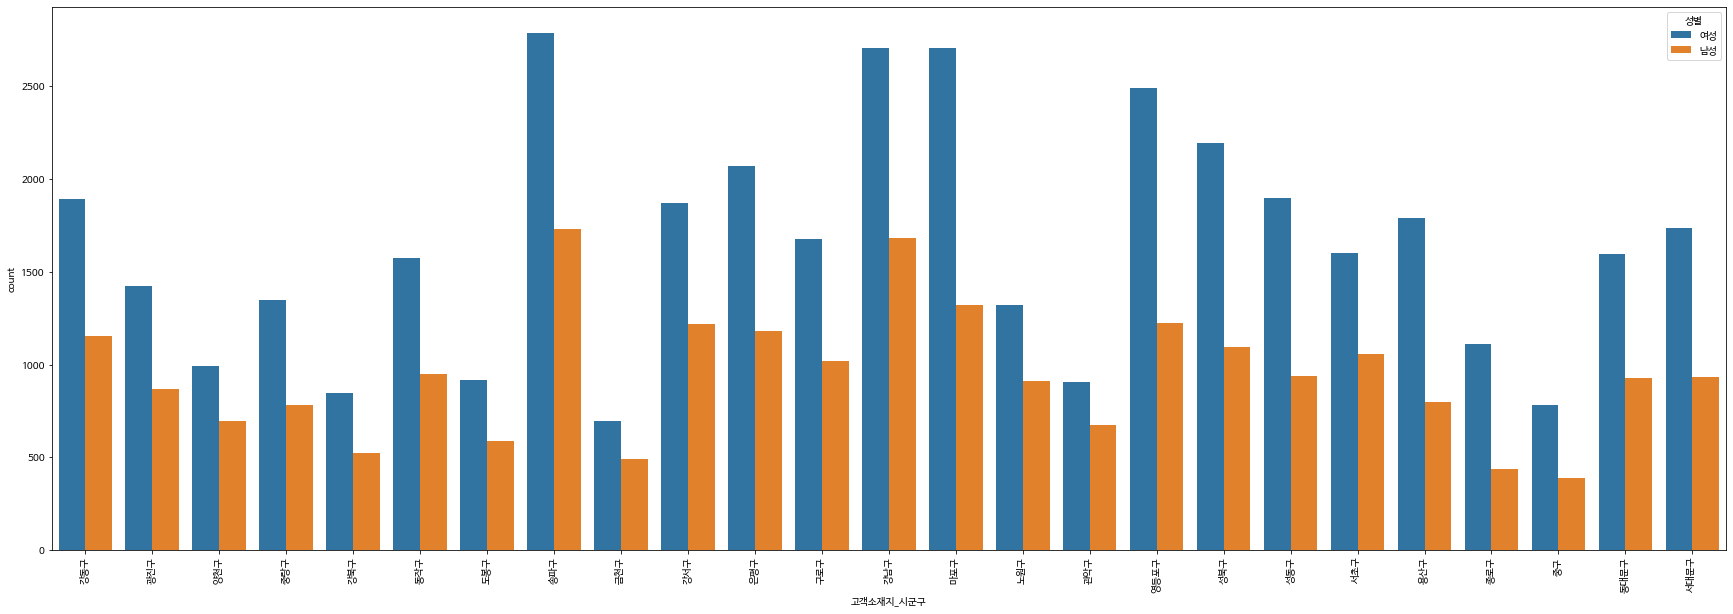

송파구     1.0
강남구     2.0
마포구     3.0
영등포구    4.0
성북구     5.0
Name: 고객소재지_시군구, dtype: float64
송파구     1.0
강남구     2.0
마포구     3.0
영등포구    4.0
강서구     5.0
Name: 고객소재지_시군구, dtype: float64


In [25]:
sigoongu = list(set(df_1903['고객소재지_시군구']))
print(len(sigoongu),'개')
print(sigoongu)

###################################### 필요한지에 대해서 의문
# print(df_1903['고객소재지_시군구'].value_counts()) 
# 이게 의미하는 바가 여성 의류 13건(==> 여성 의류별 1건) +  남성 의류 2건(==> 남성 의류별 1건) +  ,,,
# 이렇게 진행되는데 그냥 시군구별row를 개수 세서 저장하는건데 필요한지는 의문
# 아니면 내가 이걸 잘못 이해하고 있는 것일 수도 있음

plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '성별', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

print(df_1903_female['고객소재지_시군구'].value_counts().rank(ascending = False).head(5))
print(df_1903_male['고객소재지_시군구'].value_counts().rank(ascending = False).head(5))

5 개
['1인가구', '노인가구', '초중고자녀가구', '신혼영유아가구', '성인자녀가구']
신혼영유아가구    23051
1인가구       17269
초중고자녀가구    11881
성인자녀가구      9274
노인가구        3056
Name: 가구생애주기, dtype: int64


<AxesSubplot:>

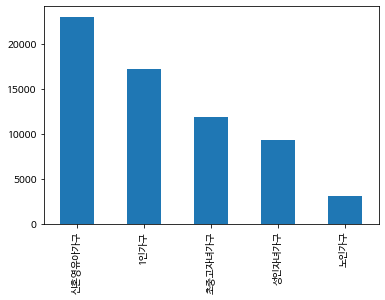

In [26]:
family = list(set(df_1903['가구생애주기']))
print(len(family),'개')
print(family)

print(df_1903['가구생애주기'].value_counts())
df_1903['가구생애주기'].value_counts().plot.bar()

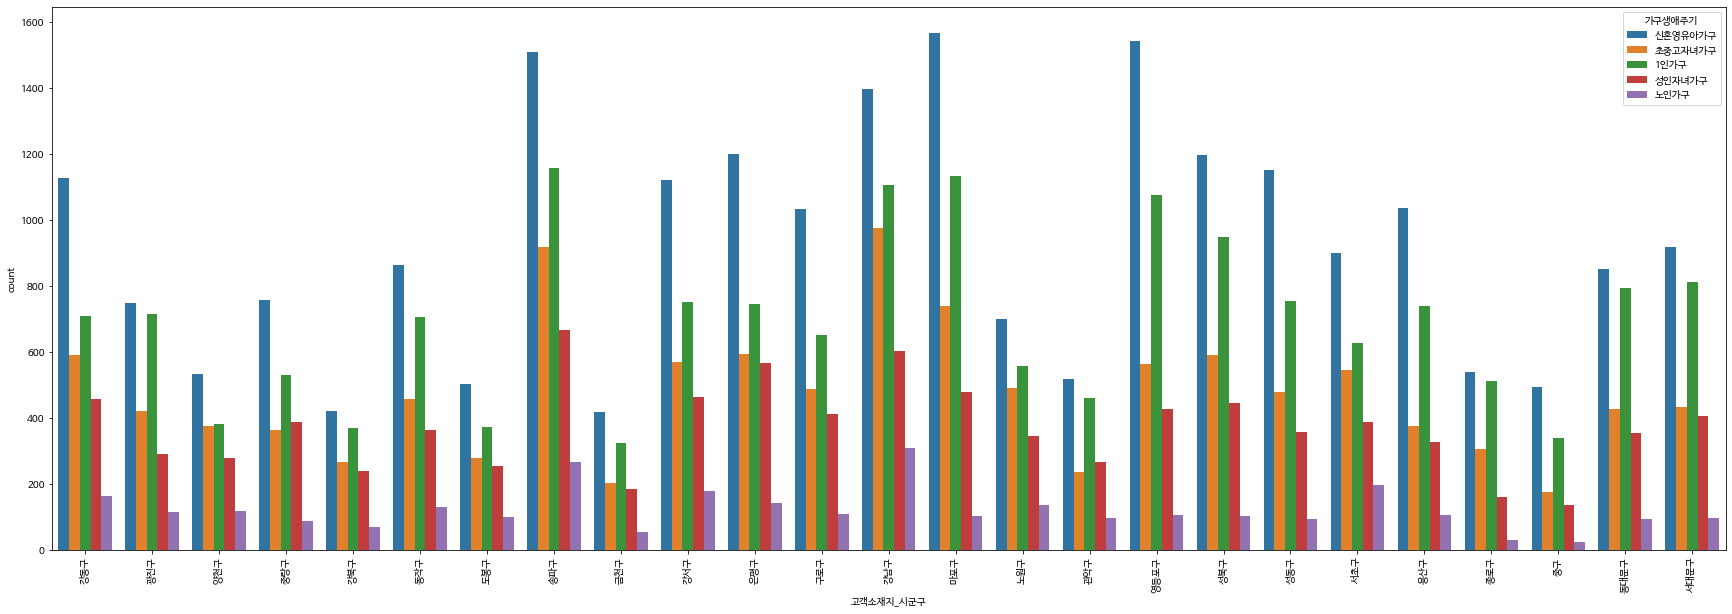

In [27]:
plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '가구생애주기', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

# 이렇게 한번에 보는 것도 방법이지만 따로 시군구 별로 plot해서 만드는거 계획 예정
# 추가로 명수라고 해야 되나 그 건수?도 추가 예정
# ex) 군포시 1인가구 : 123, 노인가구 : 123


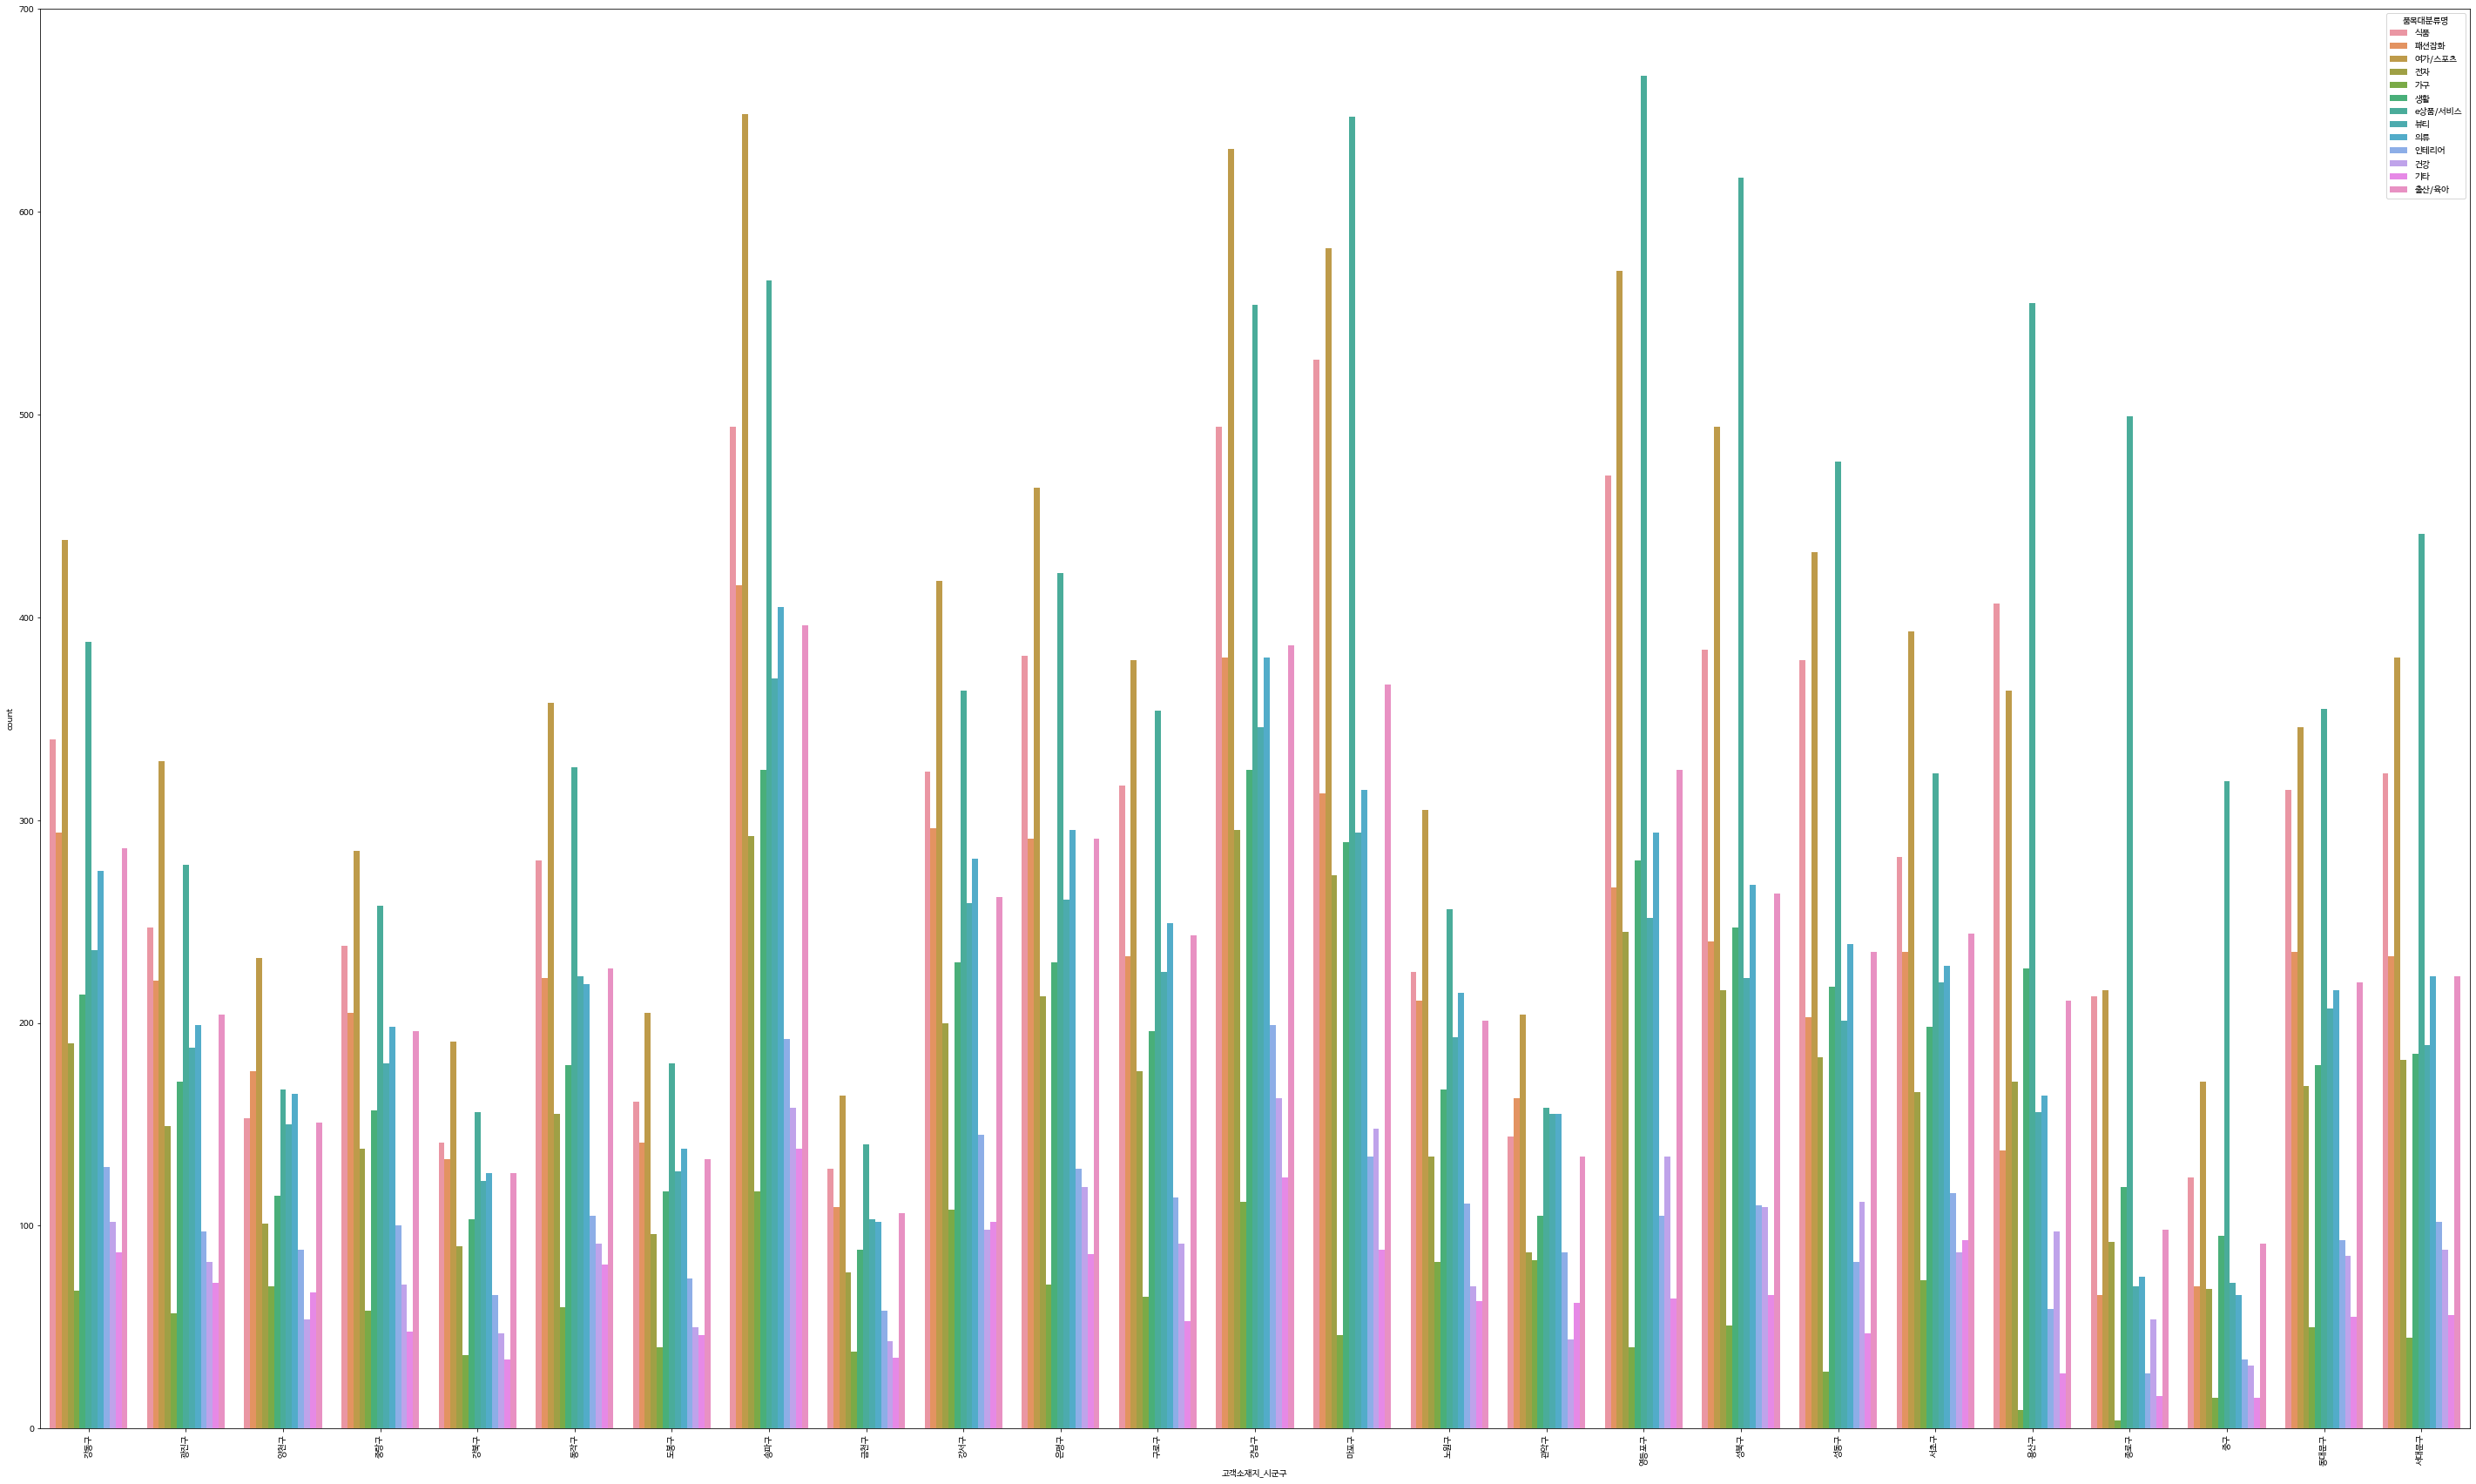

In [28]:
plt.figure(figsize=(50,30))
sns.countplot(x='고객소재지_시군구', hue = '품목대분류명', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

# 여기 부분도 변경 예정
# 각 시군구 별로 매출금액 - 대품목별, 중품목별 매출건수 - 대품목별, 중폼목별
# 총 4개의 그래프 추가 예정

고객소재지_시군구
강남구     10114690441
강동구      5618273069
강북구      2909955309
강서구      7413049439
관악구      6568404745
광진구      4591083978
구로구      4820411860
금천구      2672722434
노원구      5724657085
도봉구      3057663546
동대문구     4085825241
동작구      4890817941
마포구      5653851944
서대문구     4459953391
서초구      6974822601
성동구      3725953271
성북구      4472249193
송파구      9709157911
양천구      5682714788
영등포구     4954940686
용산구      2900502967
은평구      5148492800
종로구      1378667903
중구       1644460388
중랑구      3979619876
Name: 매출금액, dtype: int64


<AxesSubplot:xlabel='고객소재지_시군구'>

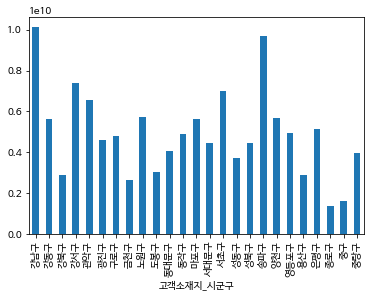

In [29]:
df_1903_매출금액합 = df_1903.groupby('고객소재지_시군구')['매출금액'].sum()
print(df_1903_매출금액합)
df_1903_매출금액합.plot.bar()

고객소재지_시군구
강남구     180830
강동구     119513
강북구      69154
강서구     162268
관악구     159774
광진구      99202
구로구     109509
금천구      62560
노원구     129783
도봉구      69470
동대문구     90758
동작구     108694
마포구     113826
서대문구     95897
서초구     121938
성동구      74875
성북구      99671
송파구     187324
양천구     114079
영등포구    105409
용산구      54775
은평구     114971
종로구      28966
중구       32371
중랑구      92965
Name: 매출건수, dtype: int64


<AxesSubplot:xlabel='고객소재지_시군구'>

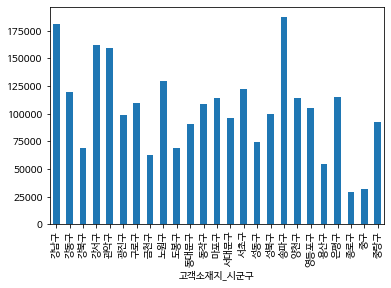

In [30]:
df_1903_매출건수합 = df_1903.groupby('고객소재지_시군구')['매출건수'].sum()
print(df_1903_매출건수합)
df_1903_매출건수합.plot.bar()